In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv("all_pokemon_data.csv")
data.head(5)

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [4]:
data=data.bfill()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       1184 non-null   object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [6]:
data.describe()

,National Dex #,Evolution Stage,Number of Evolution,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,494.978041,1.597128,2.108108,92.202703,12.829392,730.995777,50.535473,161.163851,441.633446,70.910473,80.989020,74.817568,72.922297,72.265203,69.728885
std,299.166288,0.700700,0.735618,75.715485,13.646223,1311.060248,53.682455,289.037497,119.296702,26.406800,31.955337,30.324208,32.426324,27.095940,30.110391
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,230.750000,1.000000,2.000000,45.000000,6.000000,89.750000,24.000000,20.000000,330.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,486.500000,1.000000,2.000000,60.000000,10.000000,300.000000,39.000000,66.000000,464.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,751.250000,2.000000,3.000000,127.000000,16.000000,775.500000,63.000000,171.250000,520.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,3.000000,3.000000,255.000000,200.000000,9999.000000,787.000000,2204.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [8]:
le=LabelEncoder()
data["Name"]=le.fit_transform(data["Name"])
data["Primary Typing"]=le.fit_transform(data["Primary Typing"])
data["Secondary Typing"]=le.fit_transform(data["Secondary Typing"])
data["Generation"]=le.fit_transform(data["Generation"])
data["Form"]=le.fit_transform(data["Form"])
data["Color ID"]=le.fit_transform(data["Color ID"])

In [11]:
x=data.drop(["Evolution Stage"],axis=1)
y=data["Evolution Stage"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes Classifier": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [13]:
param_grid = {
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Decision Tree Classifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs", "saga"]
    },
    "Naive Bayes Classifier": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 10],
        "subsample": [0.7, 0.8, 0.9, 1.0]
    }
}

In [14]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_search = RandomizedSearchCV(
        model, param_grid[model_name], 
        n_iter=20, scoring='accuracy', 
        cv=5, random_state=42, n_jobs=-1
    )
    param_search.fit(x_train, y_train)
    best_models[model_name] = param_search.best_estimator_
    print(f"Best parameters for {model_name}: {param_search.best_params_}\n")

Tuning Random Forest Classifier...
Best parameters for Random Forest Classifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

Tuning Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

Tuning Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

Tuning Naive Bayes Classifier...
Best parameters for Naive Bayes Classifier: {'var_smoothing': 1e-09}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}



In [15]:
for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 0.9409
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       122
           2       0.89      0.94      0.91        79
           3       1.00      0.83      0.91        36

    accuracy                           0.94       237
   macro avg       0.95      0.92      0.93       237
weighted avg       0.94      0.94      0.94       237

Decision Tree Classifier Accuracy: 0.9451
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       122
           2       0.92      0.91      0.92        79
           3       1.00      0.92      0.96        36

    accuracy                           0.95       237
   macro avg       0.96      0.93      0.94       237
weighted avg       0.95      0.95      0.95       237

K-Nearest Neighbors Accuracy: 0.7131
              precision    recall  f1-score   support

           1       0.77      0.84      0.81       122
        

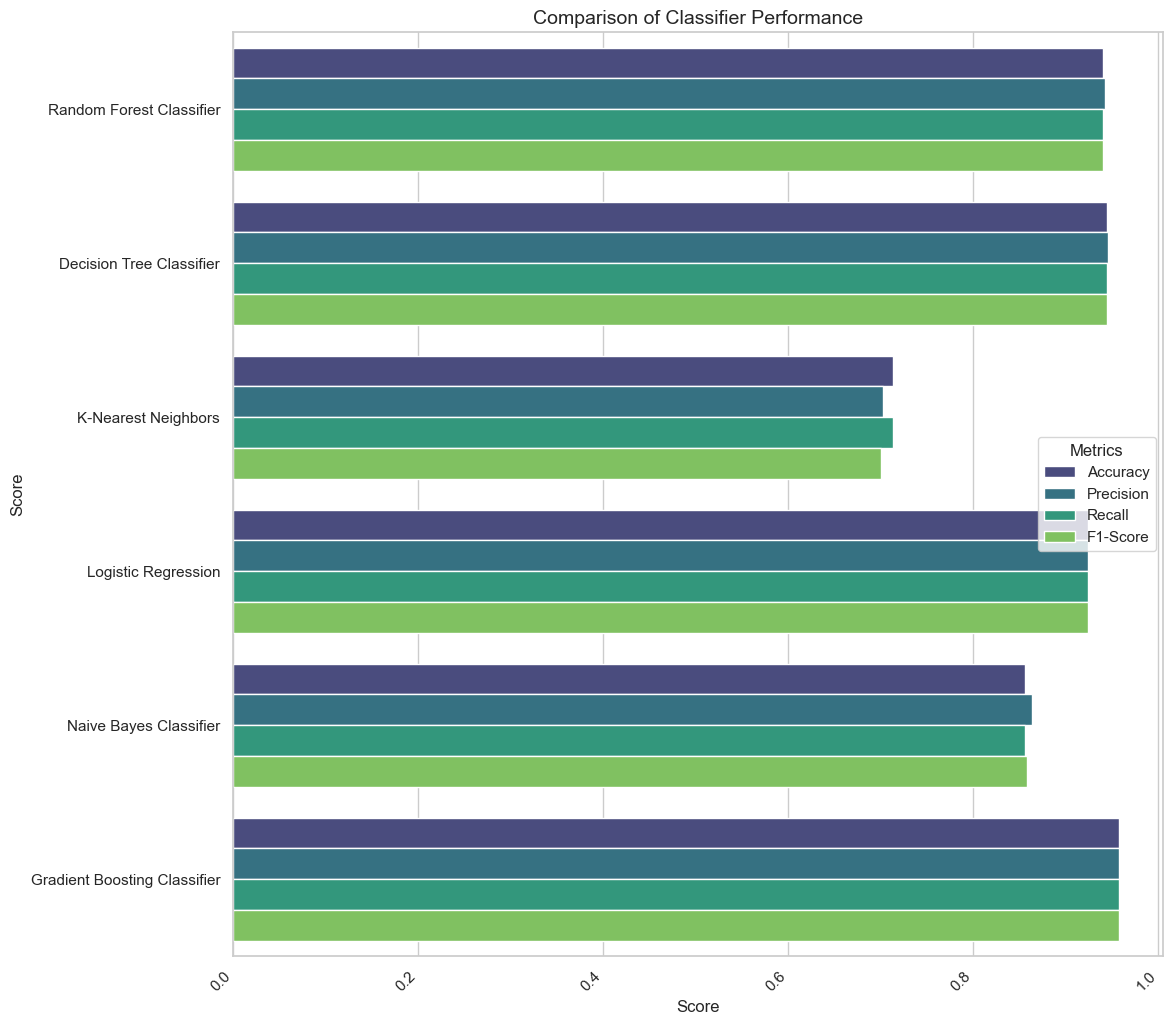

In [16]:
results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in best_models.items():
    y_pred = model.predict(x_test)

    results["Classifier"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
sns.barplot(y="Classifier", x="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Comparison of Classifier Performance", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.legend(title="Metrics")

plt.show()

# If you like the notebook then dont forget to upvote !